# Laboratorio 2022-2023

##  Sesión 15: Experimentos aleatorios II (fenómenos aleatorios continuos)

En la sesión anterior hemos considerado fenómenos aleatorios _discretos_ en los que los posibles resultados formaban un conjunto finito o numerable. En esta trabajaremos con fenómenos aleatorios _continuos_, en los que los posibles resultados formarán un conjunto no numerable, como un intervalo o todo $\mathbb{R}$.

Para fijar ideas, empezamos considerando un fenómeno aleatorio en el que los posibles resultados son, "con la misma probabilidad", todos los números del intervalo $[0,1]$. Esto es lo que se conoce como una _distribución de probabilidad uniforme_ en $[0,1]$. Una vez que el conjunto de resultados posibles es infinito, la regla de Laplace deja de tener sentido. Por otra parte, cada número en el intervalo tiene _probabilidad 0_ de aparecer (¡aunque se pueda dar!). Lo que uno se pregunta en estos casos es la probabilidad de que el resultado caiga dentro de un subconjunto especificado del intervalo $[0,1]$. Al considerar que la distribución es uniforme, la probabilidad de caer en un  subconjunto vendrá determinada por la proporción que supone del total, es decir, por su "longitud". 

La distribución uniforme en $[0,1)$ (dado que cada punto tiene probabilidad 0, no es importante si están incluidos o no los extremos) se puede simular con la instrucción $\texttt{random}()$, que ya conocemos de la sesión anterior. La idea de que la probabilidad es proporcional a la longitud ya se usó allí para simular lanzamientos de monedas trucadas, en las que la probabilidad de cara es $p$, mediante la instrucción $\texttt{random}()<p$. 

Para simular una distribución uniforme en el intervalo $[a,b]$ en Sagemath podemos usar 
$a+(b-a)*\texttt{random}()$ o bien la instrucción $\texttt{uniform}(a,b)$.

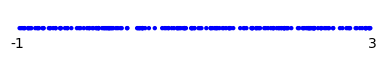

In [1]:
# Ejecuta y analiza
puntos=[]
for _ in xsrange(200):
    puntos+=[(uniform(-1,3),0)]#Sorteamos la primera coordenada en el intervalo [-1,3)
ilustra=points(puntos,figsize=4,ymin=-.2,ymax=.2,axes=false,aspect_ratio=1)
ilustra+=text('-1',(-1,-.1),vertical_alignment="top",color='black')
ilustra+=text('3',(3,-.1),vertical_alignment="top",color='black')
show(ilustra)

Denotaremos una distribución uniforme en un intervalo que tiene por extremos $a$ y $b$  (con $a<b$) mediante $U(a,b)$. Como se ha indicado antes, no es importante si están incluidos o no los extremos. 

En ocasiones no es cierto que todos los resultados posibles tengan la "misma probabilidad". Por ejemplo, puede que estemos lanzando dardos sobre el intervalo $[1,5]$ y el tirador tenga el doble de facilidad de acertar en $[1,3)$ que en $[3,5]$. Si $A$ es el suceso acertar en $[1,3)$, ocurre que $P(A)=2/3$ y $P(A^c)=1/3$; pero $A=[1,3)$ y $A^c=[3,5]$ tienen ambos la misma longitud. Estas situaciones se modelan por medio de la llamada _función de densidad_. 
Así, si un fenómeno aleatorio tiene asociada una función de densidad $f$, que tiene que ser no negativa y tener integral total $1$, la probabilidad de un subconjunto $A$ vendrá dada por
$$P(A)=\int_A f(x)\,{\rm d}x.$$
Un caso particular es la función constante $f(x)=\frac{1}{b-a}$ si $a\le x\le b$, que corresponde a la distribución uniforme en $[a,b]$, pues
$$P([c,d])=\int_c^d\frac1{b-a}\,{\rm d}x=\frac{d-c}{b-a}\qquad \text{ si }a\le c< d\le b.$$

Ya conoces del bachillerato un tipo de distribución no uniforme, la distribución _normal_ con media $\mu\in\mathbb{R}$ y desviación típica $\sigma\in(0,\infty),$ que denotaremos por $N(\mu,\sigma)$, cuya función de densidad $f:\mathbb{R}\to\mathbb{R}$ viene dada por 
$$
f(x)=\frac1{\sigma\sqrt{2\pi}}\,\exp\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big).
$$ 
En los siguientes ejercicios trabajaremos con este tipo de distribuciones, que se simulan con la instrucción de SageMath $\texttt{normalvariate}(\mu, \sigma)$. 

In [1]:
# Comprobemos que la integral de la función de densidad de una distribución normal N(mu,sigma) es 1

var('mu,sigma')
assume(sigma>0)#Es necesario indicar esta restricción 
f(x)=exp(-(x-mu)^2/(2*sigma^2))/(sigma*sqrt(2*pi))
integral(f(x),x,-oo,+oo).simplify()

1

In [2]:
show(f)

x |--> 1/2*sqrt(2)*e^(-1/2*(mu - x)^2/sigma^2)/(sqrt(pi)*sigma)

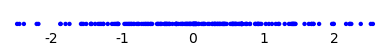

In [3]:
# Ejecuta y analiza

puntos=[]
for _ in xsrange(200):
    puntos+=[(normalvariate(0,1),0)]
ilustra=points(puntos,figsize=4,ymin=-.2,ymax=.2,axes=false,aspect_ratio=1)
ilustra+=text('-2',(-2,-.1),vertical_alignment="top",color='black')
ilustra+=text('-1',(-1,-.1),vertical_alignment="top",color='black')
ilustra+=text('0',(0,-.1),vertical_alignment="top",color='black')
ilustra+=text('1',(1,-.1),vertical_alignment="top",color='black')
ilustra+=text('2',(2,-.1),vertical_alignment="top",color='black')
show(ilustra)

**Ejemplo.-** (Problema A.4 de Matemáticas II de la EVAU 2020-2021) El tiempo de vida de los individuos de cierta especie animal tiene una distribución normal con una media de 8.8 meses y una desviación típica de 3 meses.

**a)** ¿Qué porcentaje de individuos de esta especie supera los 10 meses? ¿Qué porcentaje de individuos ha vivido entre 7 y 10 meses?

**b)** Si se toman al azar 4 especímenes, ¿cuál es la probabilidad de que al menos uno no supere los 10 meses de vida?

**c)** ¿Qué valor de $c$ es tal que el intervalo $(8.8 -c, 8.8 + c)$ incluye el tiempo de vida (medido en meses) del 98 % de los individuos de esta especie?

In [7]:
# a) Calculo exacto (nada de tablas, integramos con la ayuda de SageMath)
mu,sigma=8.8,3
f(x)=exp(-(x-mu)^2/(2*sigma^2))/(sigma*sqrt(2*pi))
print(integral(f(x),x,10,+oo).n()*100)
print(integral(f(x),x,7,10).n()*100)

34.4578258389676
38.1168623860251


In [8]:
# a) Cálculo experimental
exitos=0.
total=1e6
for _ in xsrange(total):
    exitos+=(normalvariate(8.8,3)>10) # Suma 1 o 0 si cumple la condición
(exitos/total)*100

34.5752000000000

In [9]:
exitos=0.
total=1e6
for _ in xsrange(total):
    exitos+=(7 < normalvariate(8.8,3) <10)
(exitos/total)*100

38.1573000000000

In [10]:
# b) Cálculo exacto

# El suceso pedido es el complementario de la probabilidad de que los cuatro superen los 10 meses
# Comenzamos calculando la probabilidad de este último suceso. 
# Para ello necesitamos conocer la probabilidad de que cada uno supere los 10 meses

p10=integral(f(x),x,10,+oo).n() # probabilidad de superar los 10 meses
pcomp=p10^4 # probabilidad del suceso complementario
p=1-pcomp # probabilidad pedida
p

0.985902195412826

In [11]:
# b) Cálculo experimental

exitos=0.
total=1e6
for _ in xsrange(total):
    exitos+=(sum([normalvariate(8.8,3)<10 for _ in xsrange(4)])>0)
(exitos/total)

0.985768000000000

In [16]:
# c) 
var('c')
assume(c>0)
solve(integral(f(x),x,8.8-c,8.8+c)==0.98,c)[0].rhs().n()

6.97904362212252

In [ ]:
var('c')
solve(integral(f(x),x,8.8-c,8.8+c)==0.98,c)

**Ejercicio 1.-** La altura, en centímetros, de un español elegido al azar sigue una distribución $N(170,20)$. Calcular, experimentalmente, la probabilidad de encontrar entre un grupo de $10$ españoles elegidos al azar, al menos $3$ con altura superior a $185\,$cm y al menos $2$ por debajo de $150\,$cm.

In [12]:
# Primera idea: En un grupo ordenado de $10$ simulaciones al azar de alturas, es fácil 
# ver si hay al menos 2 por debajo de $150$ y al menos 3 que superan los $180$ con solo 
# observar dos de sus elementos.

t0=walltime() # Cronómetro a cero
mu,s=170,20
ngrupo=10
M=10^5
exito=0
for _ in xsrange(M):
    grupo=[normalvariate(mu,s) for _ in xsrange(ngrupo)] # Experimento que repetimos M veces
    grupo.sort()#Ordenamos el grupo por estaturas, de menor a mayor
    exito+=(grupo[1]<=150) and (grupo[-3]>=185) #Al menos 2 por debajo de 150 y al menos 3 por encima de 185
print((exito/M).n())
print('Se tarda',walltime(t0)) # walltime(t0)= tiempo (en segundos) que ha pasado desde que se asignó t0

0.154290000000000
Se tarda 4.714522838592529


In [13]:
# Ordenar supone mover datos de unas posiciones de memoria a otras y suele ser costoso. 
# Para listas con bastantes elementos el efecto en el tiempo de cálculo puede ser relevante.
# Proponemos un algoritmo alternativo que evita el tener que ordenar la lista: 
# basta con ir apuntando si cada individuo sorteado verifica alguna de las restricciones 
# impuestas. 

t0=walltime()
mu,s=170,20
ngrupo=10
M=10^5 #Rebajamos el número de pruebas de Montecarlo
exito=0
for _ in xsrange(M):
    grupo=[normalvariate(mu,s) for _ in xsrange(ngrupo)] #Este es el experimento que repetimos M veces
    altos,bajos=0,0 #Las dos clases sobre las que tenemos interés
    for dato in grupo:
        if dato>185: altos+=1
        elif dato<150: bajos+=1
    exito+=((altos>=3) and (bajos>=2))
print((exito/M).n())
print('Se tarda',walltime(t0))

0.158310000000000
Se tarda 4.986611604690552


In [14]:
# Otra versión: lo mismo pero sin listas
t0=walltime()
mu,s=170,20
ngrupo=10
M=10^5 #Rebajamos el número de pruebas de Montecarlo
exito=0
for _ in xsrange(M):
    altos,bajos=0,0
    for _ in xsrange(ngrupo):
        dato=normalvariate(mu,s)
        altos+=(dato>185)
        bajos+=(dato<150)
    exito+=bool((altos>=3) and (bajos>=2))
print((exito/M).n())
print('Se tarda',walltime(t0))

0.155640000000000
Se tarda 5.853116035461426


In [15]:
# Otra posibilidad, rebañando un poco más de tiempo

t0=walltime()
mu,s=170,20
ngrupo=10
M=10^5 #Rebajamos el número de pruebas de Montecarlo
exito=0
for _ in xsrange(M):
    altos,bajos=0,0
    npersonas=0
    secumple=0
    while npersonas<ngrupo and not secumple:
        dato=normalvariate(mu,s)
        altos+=(dato>185)
        bajos+=(dato<150)
        npersonas+=1
        secumple=bool((altos>=3) and (bajos>=2)) # Esta comprobación es costosa
    exito+=secumple
    #print(npersonas,exito)
print((exito/M).n())
print('Se tarda',walltime(t0))

0.159410000000000
Se tarda 5.0081470012664795


SageMath no tiene una instrucción para simular cada tipo de distribución. ¿Qué hacemos si queremos generar aleatoriamente observaciones que sigan una distribución que no sea una $U(a,b)$ o una $N(\mu,\sigma)$? Usaremos como herramienta un objeto importante en Probabilidad: la  _función de distribución_.

Si tenemos una función de densidad $f$ sobre un intervalo $[a,b]$, y tomamos la primitiva $F(x)=\int_a^x f(t)\,dt$, entonces
$$P([c,d])=F(d)-F(c)\quad \text{si }a\le c<d\le b.$$
La función $F(x)=\int_a^x f(t)\,dt$ es, así, una herramienta ideal para el cálculo de probabilidades y se conoce como la función de distribución. Obsérvese que la función de distribución $F(x)$ siempre toma valores entre $0$ y $1$. De hecho, $F$ está transformando nuestra distribución de probabilidad original en una distribución $U(0,1)$. Por tanto, si denotamos por $H$ a la inversa de la función de distribución $F$, la instrucción 
$$
H(\texttt{random}())
$$
generará aleatoriamente observaciones regidas por la función de distribución $F$.

**Ejemplo.-**  Consideramos una distribución de probabilidad uniforme $U(a,b)$. Su función de densidad es $f(x)=1/(b-a)$, $x\in [a,b]$,  y su función de distribución $F(x)=\frac{x-a}{b-a}$, $x\in [a,b]$. La inversa de $F$ está dada por $H(t)=a+(b-a)t$, $t\in[0,1]$. Según acabamos de decir, para generar observaciones de $U(a,b)$ basta con tomar $xx=H(\texttt{random}())=a+(b-a)*\texttt{random}()$, algo que ya sabíamos.


Para ilustrar lo que estamos haciendo generamos $100$ valores de una $U(2,4)$ por medio del esquema  
$$
yy=\texttt{random}(),\quad xx=a+(b-a)*yy,\quad a=2,\ b=4,
$$
y mostramos un dibujo en que unimos por una línea los puntos $(0,yy)$, $(xx,F(xx))$ y $(xx,0)$ que vamos generando, junto con la gráfica de la función de distribución $F(x)$.

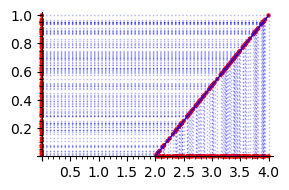

In [16]:
a,b=2,4
F_uniforme(x)=(x-a)/(b-a)
Grafica=plot(F_uniforme,x,a,b,figsize=5)
for _ in range(100):
    yy=random()
    xx=a+(b-a)*yy
    puntos=[(0,yy),(xx,yy),(xx,0)]
    Grafica+=points(puntos,color='red')+line(puntos,linestyle=':',alpha=.3)
Grafica.show(figsize=3)

x |--> piecewise(x|-->1/3 on (1, 3), x|-->1/6 on (3, 5); x)


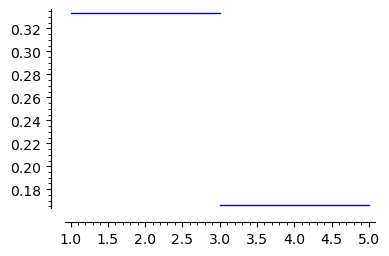

piecewise(x|-->1/3*x - 1/3 on (1, 3), x|-->1/6*x + 1/6 on (3, 5); x)


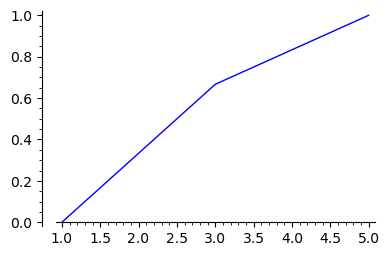

In [17]:
#Otro ejemplo: el que mencionamos al principio. Se elige un número entre 1 y 5 con doble de probabilidad
# de que caiga en (1,3) que en (1,5)
f(x) = piecewise([((1,3), 2/6), ((3,5), 1/6)]) #la función de densidad en este caso
figf=plot(f,1,3)+f.plot(3,5)
print(f)
figf.show(figsize=4)
F=integrate(f) #la función de distribución de probabilidad
figF=plot(F,1,5)
print(F)
figF.show(figsize=4)

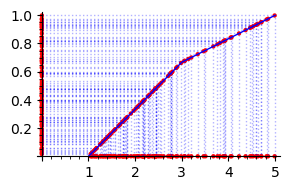

In [18]:
H=piecewise([((0,2/3), 3*x+1), ((2/3,1), 6*x-1)]) #La inversa de F
Grafica=plot(F,x,1,5,figsize=5)
for _ in range(100):
    yy=random()
    xx=H(yy)
    puntos=[(0,yy),(xx,yy),(xx,0)]
    Grafica+=points(puntos,color='red')+line(puntos,linestyle=':',alpha=.3)
Grafica.show(figsize=3)

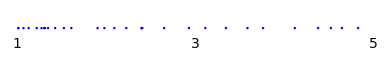

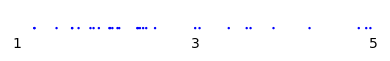

In [19]:
#Otra forma de representar el experimento de elegir números (como hicimos con la uniforme)
puntos=[]
for _ in xsrange(30):
    puntos+=[(H(random()),0)]
ilustra=points(puntos,figsize=4,ymin=-.2,ymax=.2,axes=false,aspect_ratio=1, pointsize=3)
ilustra+=text('1',(1,-.1),vertical_alignment="top",color='black')
ilustra+=text('3',(3,-.1),vertical_alignment="top",color='black')
ilustra+=text('5',(5,-.1),vertical_alignment="top",color='black')
show(ilustra)#Otra forma de representar el experimento de elegir números (como hicimos con la uniforme)
puntos=[]
for _ in xsrange(30):
    puntos+=[(H(random()),0)]
ilustra=points(puntos,figsize=4,ymin=-.2,ymax=.2,axes=false,aspect_ratio=1, pointsize=3)
ilustra+=text('1',(1,-.1),vertical_alignment="top",color='black')
ilustra+=text('3',(3,-.1),vertical_alignment="top",color='black')
ilustra+=text('5',(5,-.1),vertical_alignment="top",color='black')
show(ilustra)

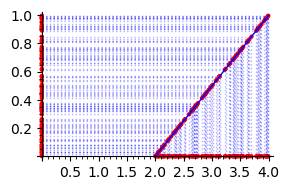

0.5998640060424805

In [20]:
t0=walltime()
a,b=2,4
F_uniforme(x)=(x-a)/(b-a)
Grafica=plot(F_uniforme,x,a,b,figsize=5)
for _ in range(100):
    yy=random()
    xx=a+(b-a)*yy
    puntos=[(0,yy),(xx,F_uniforme(xx)),(xx,0)]
    Grafica+=points(puntos,color='red')+line(puntos,linestyle=':',alpha=.3)
Grafica.show(figsize=3)
walltime(t0)

Aplicamos ahora la idea a una distribución no trivial importante, la **distribución exponencial** de parámetro $\lambda$, que denotamos por $\operatorname{exp}(\lambda)$.

- Densidad: $f(x)=\lambda {\rm e}^{-\lambda x}$, $x>0$.
- Distribución: $F(x)=1-{\rm e}^{-\lambda x}$, $x>0$.
<details><summary><b>Comprobación</b>:</summary>
$$F(x)=\int_0^x f(t)\,dt=\int_0^x\lambda{\rm e}^{-\lambda t}\,dt=-\left.{\rm e}^{-\lambda t}\right|_0^x=1-{\rm e}^{-\lambda x}.
$$</details>
- Inversa de la función de distribución: $\scriptsize H(x)=\frac{-1}{\lambda}\log(1-x)$.
<details><summary><b>Comprobación</b>:</summary>
$$y=1-{\rm e}^{-\lambda x}\,\longrightarrow\,
{\rm e}^{-\lambda x}=1-y\,\longrightarrow\,
-\lambda x=\log(1-y)\,\longrightarrow\,x=\tfrac{-1}\lambda\log(1-y).
$$</details>

**Ejercicio 2.-** **a)** Generar $100$ valores de una $\operatorname{exp}(.3)$, usando el esquema $yy=\texttt{random}()$, $xx=H(yy)$. En cada generación unir por una línea los puntos $(0,yy)$, $(xx,F(xx))$ y $(xx,0)$. Añadir la gráfica de la función de distribución $F(x)$.

**b)** Con los resultados obtenidos comparar la _media observada_ con la _teórica_ de esta distribución: $1/\lambda$.

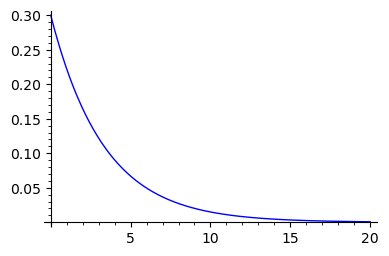

In [21]:
var('t')
assume(t>0)
l=.3
g(t)=l*e^(-l*t)
plot(g,0,20,figsize=4)

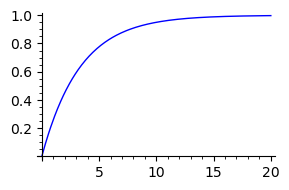

In [22]:
G(t)=1-e^(-l*t)
H(x)=(-1)/l*log(1-x)
Grafica=plot(G,0,20,figsize=5)
Grafica.show(figsize=3)

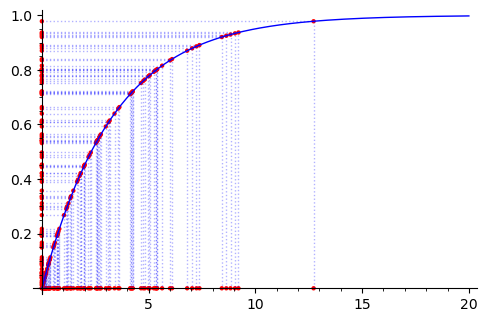

In [23]:
M=10^2 ## tamaño muestral
Grafica=plot(G,0,20,figsize=5)
datos=[]
for _ in xsrange(M):
    yy=random()
    xx=H(yy)
    puntos=[(0,yy),(xx,yy),(xx,0)]
    datos+=[xx]
    Grafica+=points(puntos,color='red')+line(puntos,linestyle=':',alpha=.3)
Grafica

In [24]:
media_observada=sum(datos)/len(datos)
media_observada,1./l

(2.75129111443442, 3.33333333333333)

**Ejercicio 3.-** En un servicio de atención telefónica transcurre una media de 10 minutos entre dos llamadas consecutivas. Se sabe que $X=$_"tiempo entre dos llamadas de dicho servicio"_ sigue una distribución $\mathrm{exp}(\lambda)$, con $\lambda=0.1$. Realizar experimentos aleatorios para calcular las siguientes probabilidades:

- $\small P(\text{al menos 5 llamadas en 1 hora})$
- $\small P(\text{5 llamadas en 1 hora})$
- $\small P(\text{a lo sumo 5 llamadas en 1 hora})$

In [26]:
def experimento(M,l=0.1): 
    X=[] #Aqui almacenaremos los tiempos entre llamadas hasta la llamada M.
    H(x)=(-1)/l*log(1-x) #Esta es la inversa de la funcion de distribucion. 
    for _ in xsrange(M):
        yy=random()
        xx=H(yy)
        X.append(xx)
    return X

In [27]:
t0=walltime()
M=10^4 
exitos=0
for _ in xsrange(M):
    exitos+=bool(sum(experimento(5))<60)
Almenoscinco=exitos/M
Almenoscinco.n(),walltime(t0)

(0.710100000000000, 4.323980093002319)

In [28]:
t0=walltime()
M=10^4
exitos=0
for _ in xsrange(M):
    observacion=experimento(6)
    exitos+=bool((sum(observacion[:5])<60) and (sum(observacion)>60))
Exactamentecinco=exitos/M
Exactamentecinco.n(),walltime(t0)

(0.158400000000000, 5.455805063247681)

In [29]:
# Apartaco c)
t0=walltime()
M=10^4
exitos=0
for _ in xsrange(M):
    exitos+=bool(sum(experimento(6))>60)
Alosumocinco=exitos/M
Alosumocinco.n(),walltime(t0)

(0.443300000000000, 5.018378257751465)